In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def step(state, action, verbose=False):
    '''Takes an action and performs it on the current state and returns the updated state
    params: state: the state of the environement - namely the sum of the dealers cards and the sum of the players cards in a 
    tuple
            action: hit or stick
    return:
            updated_state - updated state after the action has been performed
    '''
    if(action =='stick'):
        if state[0]>0 and state[0] <=17 and state[1]<=21:
            updated_state = (updateState(state[0], drawCard(verbose)), state[1])
            if verbose:
                print('state:',updated_state)
            step(updated_state,'stick', verbose)
        else:
            return state, getReward(state,True)
    if action == 'hit':
        updated_state = (state[0], updateState(state[1], drawCard(verbose)))
    return updated_state, getReward(updated_state,False)

def init():
    '''Draw two random black cards and return the state
    
    return:
        state: the initial state of the player and dealer '''
    state = (np.random.randint(1,11),np.random.randint(1,11))
    return state

def drawCard(verbose=False):
    '''Draws a random black or red card. The prob of black is 2/3 and red is 1/3
    return:
        card: a random black or red card from 1-10 inclusive'''
    n = np.random.randint(3)
    card = np.random.randint(1,11)
    if n == 1 or n == 2:
        if verbose:
            print('Drew a black', card)
        return card
    else:
        if verbose:
            print('Drew a red', card)
        return -1*card

def updateState(s,newCard):
    '''Adds the new card value to the original card value
    params: s: the original value of the state
            newCard: the new card value
    return:
            s: the updated value'''
    return s + newCard

def chooseAction(state):
    '''Very basic Policy
    params: state: current state of the environment
    return:
        the action to be performed'''
    if state[1] >= 20:
        return 'stick'
    else:
        return 'hit'
    
def getReward(state, check):
    '''Gets the reward for performing the action on the current state of the environment
    params: state: the state of the environment
            check: whether the player has said stick or not
    return: the reward based on the rules'''
    if state[0] <=21 and state[1] <=21 and state[1]>0 and state[0]>0:
        if check==True:
            if state[1]>state[0]:
                return 1
            elif state[0]>state[1]:
                return -1
            else:
                return 0
        else:
            return 0
    elif state[0]>21 and state[1] <=21 and state[1]>0:
        return 1
    elif state[0]<1 and state[1] <=21 and state[1]>0:
        return 1
    elif state[1]>21 and state[0]>0 and state[0]<=21:
        return -1
    elif state[1]<1 and state[0]>0 and state[0]<=21:
        return -1
    else:
        return 0

def gameOver(state,check):
     '''Gets whether the game is over or not based on the current state of the environment
    params: state: the state of the environment
            check: whether the player has said stick or not
    return: 
        True or False depending on the rules of the game'''
    if state[0] <=21 and state[1] <=21 and state[1]>0 and state[0]>0:
        if check==True:
            return True
        else:
            return False
    elif state[0]>21 and state[1] <=21 and state[1]>0:
        return True
    elif state[0]<1 and state[1] <=21 and state[1]>0:
        return True
    elif state[1]>21 and state[0]>0 and state[0]<=21:
        return True
    elif state[1]<1 and state[0]>0 and state[0]<=21:
        return True
    else:
        return False

def updateValue(rewards, count):
    '''Calculate the value function based on the rewards and the count. Using the everytime visit monte carlo update
    params: rewards: cumulative reward over n games
            count: number of times visiting specific states
    return:
        the updated value function'''
    v = np.zeros((10,21))
    for i in range(10):
        for j in range(21):
            if count[i][j] !=0:
                v[i][j] = rewards[i][j]/count[i][j]
    return v

In [3]:
def run(verbose,num_epochs):
    '''Runs the experiment for a number of epochs and returns the value fucntion
    params: verbose: whether to print out statements
            num_epcochs: number of episodes to run
    return: 
        updated value function'''
    value = np.zeros((10,21))
    count = np.zeros((10,21))
    rewards = np.zeros((10,21))
    for epoch in range(num_epochs):
        state = init()
        if verbose:
            print('state:', state)
        while True:
            x = state[0]-1
            y = state[1]-1
            count[x][y] = count[x][y] + 1
            action = chooseAction(state)
            if verbose:
                print('action:' , action)
            new_state, reward = step(state, action, verbose)
            rewards[x][y] = rewards[x][y] + reward
            if verbose:
                print('new state:', new_state)
                print('reward:', reward)      
            if gameOver(new_state,action=='stick'):
                break
            state = new_state
    value = updateValue(rewards,count)
    return value

In [7]:
def plot_value_fcn(val):
    '''Plots the value function'''
    X = np.arange(0, 10)
    Y = np.arange(0, 21)
    X, Y = np.meshgrid(X, Y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(np.transpose(X), np.transpose(Y), val, cmap=cm.coolwarm)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

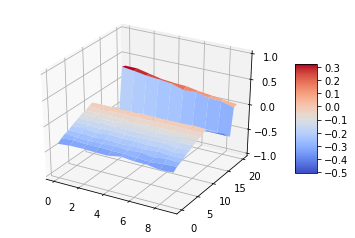

In [8]:
val = run(False,50000)
plot_value_fcn(val)

## currently the policy that is being evaluated is a very simple policy. The player hits unless the sum of his cards is greater than or equal to 20. The value function after performing 50000 monte carlo simulations is shown above. 